In [1]:
import gym

In [3]:
env = gym.make("MountainCar-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [4]:
obs = env.reset()

In [1]:
import numpy as np
from q_learning import plot_cost_to_go, FeatureTransformer, plot_running_avg

In [5]:
ft = FeatureTransformer(env)
X = ft.transform([env.observation_space.sample()])

In [7]:
X.size

2000

In [8]:
num_act = env.action_space.n
print(num_act)

3


In [3]:
model.partial_fit([[0,0]], [0])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [5]:
model.predict([[22,12]])

array([ 0.])

In [7]:
i = np.random.rand()

In [8]:
print(i)

0.7251903711023935


In [12]:
np.random.choice(10)

8

In [4]:
a=np.zeros((4))

In [5]:
print(a)

[ 0.  0.  0.  0.]


In [2]:
a = [i for i in range(10)]
print(a)
b = np.stack(a)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
b[2]

2

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
episode: 0 total reward: -200.0
episode: 1 total reward: -200.0
episode: 2 total reward: -200.0
episode: 3 total reward: -200.0
episode: 4 total reward: -200.0
episode: 5 total reward: -200.0
episode: 6 total reward: -200.0
episode: 7 total reward: -200.0
episode: 8 total reward: -200.0
episode: 9 total reward: -200.0
episode: 10 total reward: -200.0
episode: 11 total reward: -200.0
episode: 12 total reward: -200.0
episode: 13 total reward: -200.0
episode: 14 total reward: -200.0
episode: 15 total reward: -165.0
episode: 16 total reward: -200.0
episode: 17 total reward: -200.0
episode: 18 total reward: -200.0
episode: 19 total reward: -200.0
episode: 20 total reward: -200.0
episode: 21 total reward: -200.0
episode: 22 total reward: -200.0
episode: 23 total reward: -200.0
episode: 24 total reward: -200.0
episode: 25 total reward: -200.0
episode: 26 total reward: -200.0
episode: 27 total re

episode: 243 total reward: -127.0
episode: 244 total reward: -134.0
episode: 245 total reward: -133.0
episode: 246 total reward: -153.0
episode: 247 total reward: -126.0
episode: 248 total reward: -139.0
episode: 249 total reward: -127.0
episode: 250 total reward: -135.0
episode: 251 total reward: -133.0
episode: 252 total reward: -87.0
episode: 253 total reward: -128.0
episode: 254 total reward: -142.0
episode: 255 total reward: -130.0
episode: 256 total reward: -141.0
episode: 257 total reward: -150.0
episode: 258 total reward: -107.0
episode: 259 total reward: -121.0
episode: 260 total reward: -130.0
episode: 261 total reward: -128.0
episode: 262 total reward: -151.0
episode: 263 total reward: -136.0
episode: 264 total reward: -125.0
episode: 265 total reward: -119.0
episode: 266 total reward: -131.0
episode: 267 total reward: -140.0
episode: 268 total reward: -165.0
episode: 269 total reward: -123.0
episode: 270 total reward: -152.0
episode: 271 total reward: -140.0
episode: 272 to

episode: 485 total reward: -129.0
episode: 486 total reward: -131.0
episode: 487 total reward: -132.0
episode: 488 total reward: -151.0
episode: 489 total reward: -142.0
episode: 490 total reward: -132.0
episode: 491 total reward: -132.0
episode: 492 total reward: -127.0
episode: 493 total reward: -134.0
episode: 494 total reward: -125.0
episode: 495 total reward: -148.0
episode: 496 total reward: -133.0
episode: 497 total reward: -168.0
episode: 498 total reward: -131.0
episode: 499 total reward: -193.0
avg reward for last 100 episodes: -136.33
total steps: 69190.0


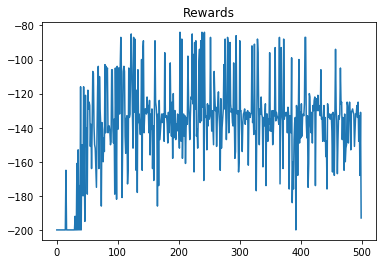

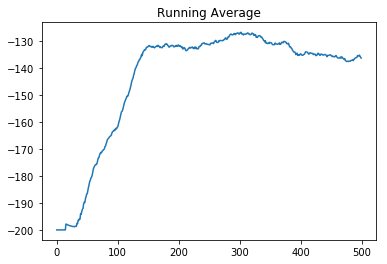

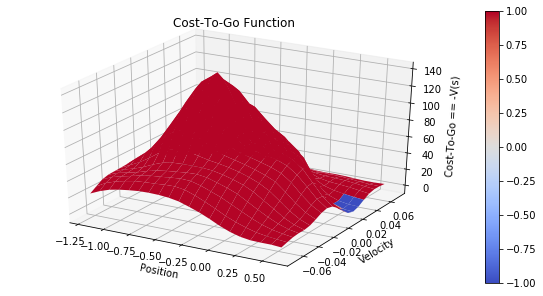

In [2]:
# https://deeplearningcourses.com/c/deep-reinforcement-learning-in-python
# https://www.udemy.com/deep-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future
#
# Note: gym changed from version 0.7.3 to 0.8.0
# MountainCar episode length is capped at 200 in later versions.
# This means your agent can't learn as much in the earlier episodes
# since they are no longer as long.
#
# Adapt Q-Learning script to use TD(lambda) method instead

import gym
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime

# code we already wrote
from q_learning import plot_cost_to_go, FeatureTransformer, plot_running_avg


class BaseModel:
  def __init__(self, D):
    self.w = np.random.randn(D) / np.sqrt(D)

  def partial_fit(self, input_, target, eligibility, lr=1e-2):
    self.w += lr*(target - input_.dot(self.w))*eligibility

  def predict(self, X):
    X = np.array(X)
    return X.dot(self.w)


# Holds one BaseModel for each action
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.models = []
    self.feature_transformer = feature_transformer

    D = feature_transformer.dimensions
    self.eligibilities = np.zeros((env.action_space.n, D))
    for i in range(env.action_space.n):
      model = BaseModel(D)
      self.models.append(model)

  def predict(self, s):
    X = self.feature_transformer.transform([s])
    assert(len(X.shape) == 2)
    result = np.stack([m.predict(X) for m in self.models]).T
    assert(len(result.shape) == 2)
    return result

  def update(self, s, a, G, gamma, lambda_):
    X = self.feature_transformer.transform([s])
    assert(len(X.shape) == 2)
    self.eligibilities *= gamma*lambda_
    self.eligibilities[a] += X[0]
    self.models[a].partial_fit(X[0], G, self.eligibilities[a])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.predict(s))


# returns a list of states_and_rewards, and the total reward
def play_one(model, env, eps, gamma, lambda_):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  # while not done and iters < 200:
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    # update the model
    next = model.predict(observation)
    assert(next.shape == (1, env.action_space.n))
    G = reward + gamma*np.max(next[0])
    model.update(prev_observation, action, G, gamma, lambda_)

    totalreward += reward
    iters += 1

  return totalreward


if __name__ == '__main__':
  env = gym.make('MountainCar-v0')
  ft = FeatureTransformer(env)
  model = Model(env, ft)
  gamma = 0.9999
  lambda_ = 0.7

  if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)


  N = 500
  totalrewards = np.empty(N)
  costs = np.empty(N)
  for n in range(N):
    # eps = 1.0/(0.1*n+1)
    eps = 0.1*(0.97**n)
    # eps = 0.5/np.sqrt(n+1)
    totalreward = play_one(model, env, eps, gamma, lambda_)
    totalrewards[n] = totalreward
    print("episode:", n, "total reward:", totalreward)
  print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
  print("total steps:", -totalrewards.sum())

  plt.plot(totalrewards)
  plt.title("Rewards")
  plt.show()

  plot_running_avg(totalrewards)

  # plot the optimal state-value function
  plot_cost_to_go(env, model)



WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
episode: 0 total reward: -80.7 num steps: 999 avg reward (last 100): -80.7
episode: 1 total reward: 35.9 num steps: 785 avg reward (last 100): -22.4
episode: 2 total reward: 37.0 num steps: 706 avg reward (last 100): -2.6
episode: 3 total reward: 69.8 num steps: 356 avg reward (last 100): 15.5
episode: 4 total reward: 62.9 num steps: 446 avg reward (last 100): 25.0
episode: 5 total reward: 28.0 num steps: 819 avg reward (last 100): 25.5
episode: 6 total reward: 82.0 num steps: 200 avg reward (last 100): 33.6
episode: 7 total reward: 54.2 num steps: 505 avg reward (last 100): 36.1
episode: 8 total reward: 51.9 num steps: 521 avg reward (last 100): 37.9
episode: 9 total reward: 71.2 num steps: 306 avg reward (last 100): 41.2
episode: 10 total reward: 56.0 num steps: 480 avg reward (last 100): 

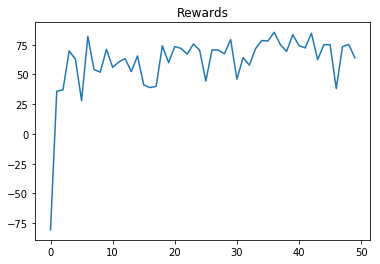

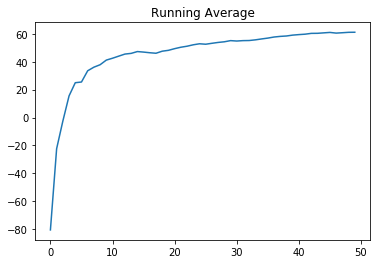

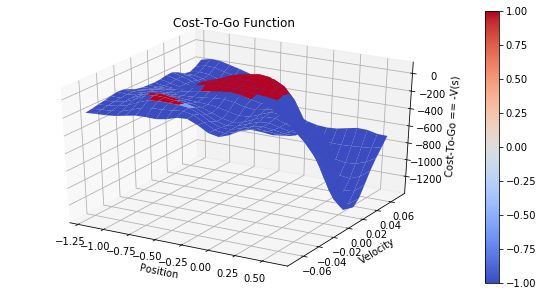

In [1]:
# https://deeplearningcourses.com/c/deep-reinforcement-learning-in-python
# https://www.udemy.com/deep-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import gym
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime
from q_learning import plot_running_avg, FeatureTransformer, plot_cost_to_go


# so you can test different architectures
class HiddenLayer:
  def __init__(self, M1, M2, f=tf.nn.tanh, use_bias=True, zeros=False):
    if zeros:
      W = np.zeros((M1, M2), dtype=np.float32)
    else:
      W = tf.random_normal(shape=(M1, M2)) * np.sqrt(2. / M1, dtype=np.float32)
    self.W = tf.Variable(W)

    self.use_bias = use_bias
    if use_bias:
      self.b = tf.Variable(np.zeros(M2).astype(np.float32))

    self.f = f

  def forward(self, X):
    if self.use_bias:
      a = tf.matmul(X, self.W) + self.b
    else:
      a = tf.matmul(X, self.W)
    return self.f(a)

# approximates pi(a | s)
class PolicyModel:
  def __init__(self, D, ft, hidden_layer_sizes=[]):
    self.ft = ft

    ##### hidden layers #####
    M1 = D
    self.hidden_layers = []
    for M2 in hidden_layer_sizes:
      layer = HiddenLayer(M1, M2)
      self.hidden_layers.append(layer)
      M1 = M2

    # final layer mean
    self.mean_layer = HiddenLayer(M1, 1, lambda x: x, use_bias=False, zeros=True)

    # final layer variance
    self.stdv_layer = HiddenLayer(M1, 1, tf.nn.softplus, use_bias=False, zeros=False)

    # inputs and targets
    self.X = tf.placeholder(tf.float32, shape=(None, D), name='X')
    self.actions = tf.placeholder(tf.float32, shape=(None,), name='actions')
    self.advantages = tf.placeholder(tf.float32, shape=(None,), name='advantages')

    # get final hidden layer
    Z = self.X
    for layer in self.hidden_layers:
      Z = layer.forward(Z)

    # calculate output and cost
    mean = self.mean_layer.forward(Z)
    stdv = self.stdv_layer.forward(Z) + 1e-5 # smoothing

    # make them 1-D
    mean = tf.reshape(mean, [-1])
    stdv = tf.reshape(stdv, [-1]) 

    norm = tf.contrib.distributions.Normal(mean, stdv)
    self.predict_op = tf.clip_by_value(norm.sample(), -1, 1)

    log_probs = norm.log_prob(self.actions)
    cost = -tf.reduce_sum(self.advantages * log_probs + 0.1*norm.entropy())
    self.train_op = tf.train.AdamOptimizer(1e-3).minimize(cost)

  def set_session(self, session):
    self.session = session

  def partial_fit(self, X, actions, advantages):
    X = np.atleast_2d(X)
    X = self.ft.transform(X)
    
    actions = np.atleast_1d(actions)
    advantages = np.atleast_1d(advantages)
    self.session.run(
      self.train_op,
      feed_dict={
        self.X: X,
        self.actions: actions,
        self.advantages: advantages,
      }
    )

  def predict(self, X):
    X = np.atleast_2d(X)
    X = self.ft.transform(X)
    return self.session.run(self.predict_op, feed_dict={self.X: X})

  def sample_action(self, X):
    p = self.predict(X)[0]
    return p

# approximates V(s)
class ValueModel:
  def __init__(self, D, ft, hidden_layer_sizes=[]):
    self.ft = ft
    self.costs = []

    # create the graph
    self.layers = []
    M1 = D
    for M2 in hidden_layer_sizes:
      layer = HiddenLayer(M1, M2)
      self.layers.append(layer)
      M1 = M2

    # final layer
    layer = HiddenLayer(M1, 1, lambda x: x)
    self.layers.append(layer)

    # inputs and targets
    self.X = tf.placeholder(tf.float32, shape=(None, D), name='X')
    self.Y = tf.placeholder(tf.float32, shape=(None,), name='Y')

    # calculate output and cost
    Z = self.X
    for layer in self.layers:
      Z = layer.forward(Z)
    Y_hat = tf.reshape(Z, [-1]) # the output
    self.predict_op = Y_hat

    cost = tf.reduce_sum(tf.square(self.Y - Y_hat))
    self.cost = cost
    self.train_op = tf.train.AdamOptimizer(1e-1).minimize(cost)

  def set_session(self, session):
    self.session = session

  def partial_fit(self, X, Y):
    X = np.atleast_2d(X)
    X = self.ft.transform(X)
    Y = np.atleast_1d(Y)
    self.session.run(self.train_op, feed_dict={self.X: X, self.Y: Y})
    cost = self.session.run(self.cost, feed_dict={self.X: X, self.Y: Y})
    self.costs.append(cost)

  def predict(self, X):
    X = np.atleast_2d(X)
    X = self.ft.transform(X)
    return self.session.run(self.predict_op, feed_dict={self.X: X})


def play_one_td(env, pmodel, vmodel, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0

  while not done and iters < 2000:
    # if we reach 2000, just quit, don't want this going forever
    # the 200 limit seems a bit early
    action = pmodel.sample_action(observation)
    prev_observation = observation
    observation, reward, done, info = env.step([action])

    totalreward += reward

    # update the models
    V_next = vmodel.predict(observation)
    G = reward + gamma*V_next
    advantage = G - vmodel.predict(prev_observation)
    pmodel.partial_fit(prev_observation, action, advantage)
    vmodel.partial_fit(prev_observation, G)

    iters += 1

  return totalreward, iters


def main():
  env = gym.make('MountainCarContinuous-v0')
  ft = FeatureTransformer(env, n_components=100)
  D = ft.dimensions
  pmodel = PolicyModel(D, ft, [])
  vmodel = ValueModel(D, ft, [])
  init = tf.global_variables_initializer()
  session = tf.InteractiveSession()
  session.run(init)
  pmodel.set_session(session)
  vmodel.set_session(session)
  gamma = 0.95

  if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)

  N = 50
  totalrewards = np.empty(N)
  costs = np.empty(N)
  for n in range(N):
    totalreward, num_steps = play_one_td(env, pmodel, vmodel, gamma)
    totalrewards[n] = totalreward
    if n % 1 == 0:
      print("episode:", n, "total reward: %.1f" % totalreward, "num steps: %d" % num_steps, "avg reward (last 100): %.1f" % totalrewards[max(0, n-100):(n+1)].mean())

  print("avg reward for last 100 episodes:", totalrewards[-100:].mean())

  plt.plot(totalrewards)
  plt.title("Rewards")
  plt.show()

  plot_running_avg(totalrewards)
  plot_cost_to_go(env, vmodel)


if __name__ == '__main__':
  main()


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
episode: 0 total reward: -86.0 num steps: 999 avg reward (last 100): -86.0
episode: 1 total reward: -92.4 num steps: 999 avg reward (last 100): -89.2
episode: 2 total reward: -90.8 num steps: 999 avg reward (last 100): -89.7
episode: 3 total reward: -89.5 num steps: 999 avg reward (last 100): -89.7
episode: 4 total reward: -94.9 num steps: 999 avg reward (last 100): -90.7
episode: 5 total reward: -96.0 num steps: 999 avg reward (last 100): -91.6
episode: 6 total reward: -94.5 num steps: 999 avg reward (last 100): -92.0
episode: 7 total reward: -95.6 num steps: 999 avg reward (last 100): -92.5
episode: 8 total reward: -96.6 num steps: 999 avg reward (last 100): -92.9
episode: 9 total reward: -96.8 num steps: 999 avg reward (last 100): -93.3
episode: 10 total reward: -96.3 num steps: 999 avg r

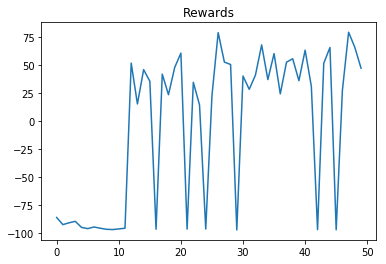

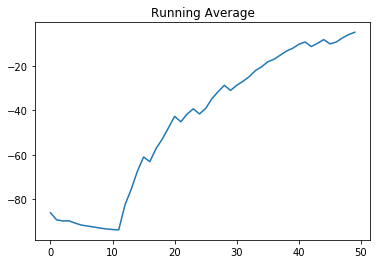

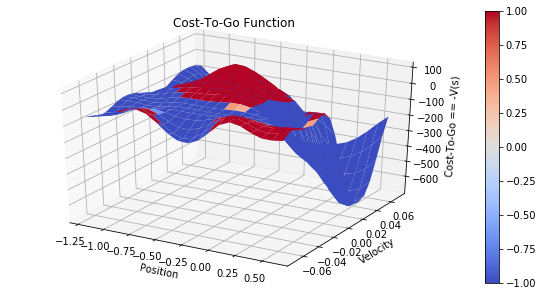

In [2]:
main()